# Import Libraries

In [33]:
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn plotnine imblearn rpy2==3.3.3  | grep -v "already satisfied"
import pandas as pd
import rpy2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

import sys


import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('image', cmap='afmhot')
import seaborn as sns

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

from skimage.feature import corner_peaks
from skimage.util import view_as_windows
from scipy.ndimage import minimum_filter, gaussian_filter

import skimage.io as skio

import ipywidgets as ipw

from IPython.display import HTML, display

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import sys
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





Defaulting to user installation because normal site-packages is not writeable
distutils: /home/pdk3/.local/lib/python3.9/site-packages
sysconfig: /home/pdk3/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [9]:
os.getcwd()
from plotnine import ggplot, geom_bar, labs, aes

# Organise the data

In [10]:
cirr_train = pd.read_csv("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/Python Translation/data/train.csv")
cirr_test = pd.read_csv("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/Python Translation/data/test.csv")

In [113]:
# p <- ggplot() +
#   geom_bar(aes(x = factor(cirr_train$Status), fill = "Train")) +
#   labs(title = "Visualising the outcome", 
#        x = "Status", 
#        y = "Frequency")
# p


# didnt no what that does

#### No of observations -

In [13]:
obs = len(cirr_train)
obs


7905

#### Total no of features -

In [14]:
feat = len(cirr_train.columns)
feat



20

#### Examining data type

In [20]:
cirr_train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

#### Changing to the correct column types

In [22]:

category_columns = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders",
                    "Edema", "Status", "Stage"]


integer_columns = ["N_Days", "Age", "Cholesterol", "Copper", "Tryglicerides",
                   "Platelets"]


cont_columns = ["Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin"]


In [23]:



cirr_train.replace("null", pd.NA, inplace=True)

cirr_train[category_columns] = cirr_train[category_columns].astype("category")


cirr_train[integer_columns] = cirr_train[integer_columns].astype("Int64") 

cirr_train.fillna(pd.NA, inplace=True)


check if it worked

In [24]:
cirr_train.dtypes

id                  int64
N_Days              Int64
Drug             category
Age                 Int64
Sex              category
Ascites          category
Hepatomegaly     category
Spiders          category
Edema            category
Bilirubin         float64
Cholesterol         Int64
Albumin           float64
Copper              Int64
Alk_Phos          float64
SGOT              float64
Tryglicerides       Int64
Platelets           Int64
Prothrombin       float64
Stage            category
Status           category
dtype: object

In [25]:
cirr_train.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

* No row is missing more than 1 'feature' of data
* No need to drop any rows
* We need to manually remove values to perform imputation

# Data Exploration

In [28]:
unique_values = cirr_train.nunique()
unique_values

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

* id seems to be unique, it can be dropped!

## Visualise Categorical Features

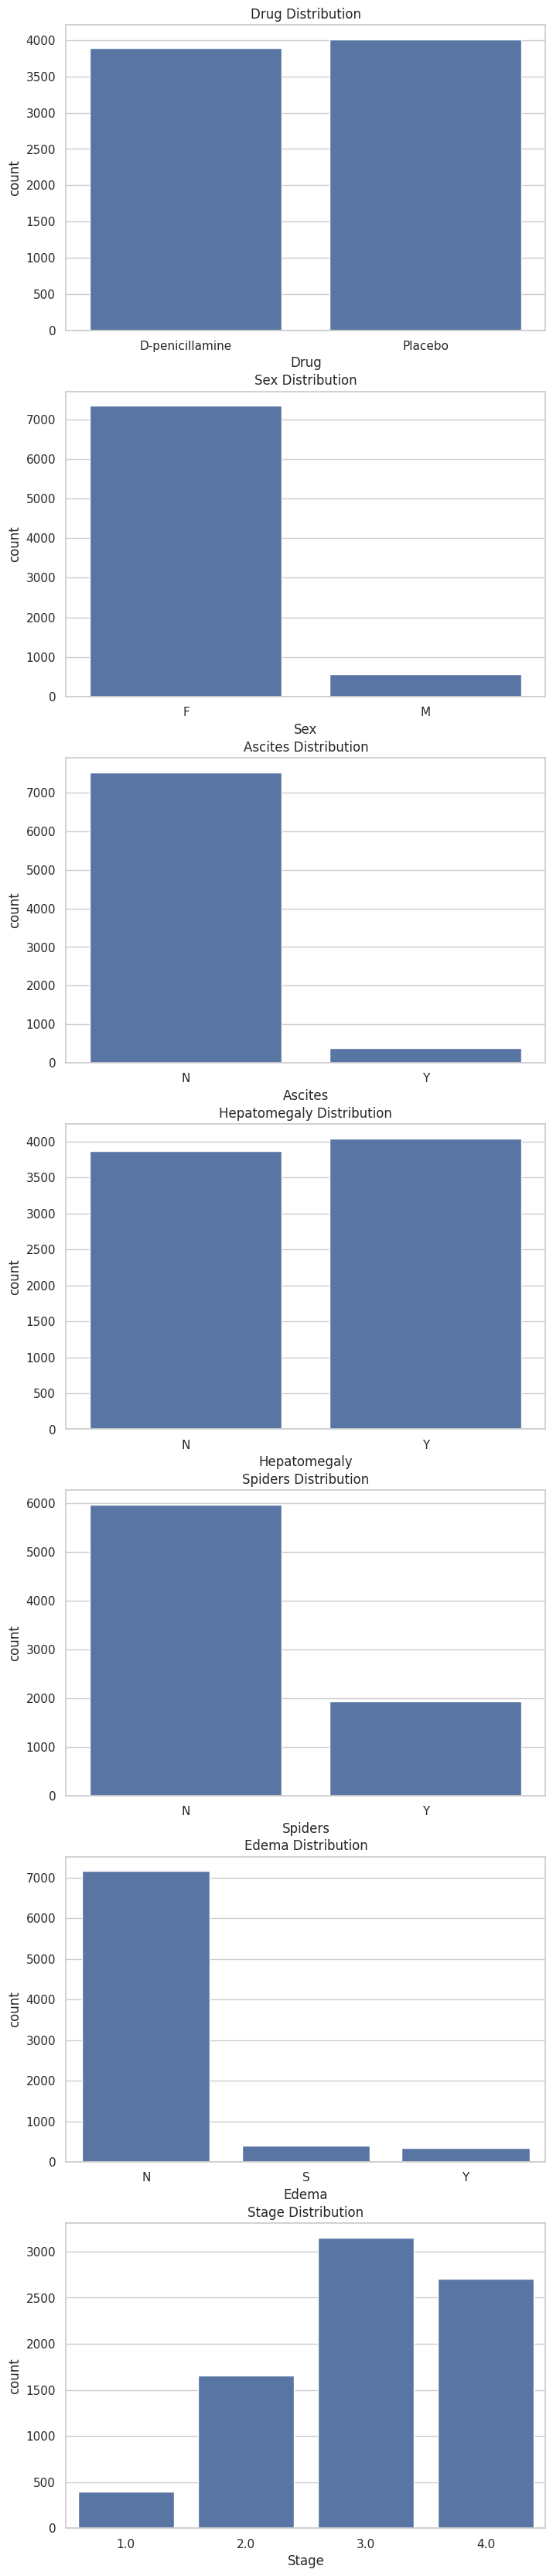

In [34]:
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]
sns.set(style="whitegrid")

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(8, 6*len(categorical_features)))
for i, var in enumerate(categorical_features):
    sns.countplot(data=cirr_train, x=var, ax=axes[i])
    axes[i].set_title(f"{var} Distribution")


plt.show()


| Feature | Balanced (Yes/No)|
|---------|-------------------|
| Drug | Yes |
| Sex | No|
| Ascites | No|
| Hepatomegaly | Yes|
| Spiders | No|
| Edema | No|
| Stage | No|


## Visualise Continous features

In [50]:
def plotHistogram(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=cirr_train, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()

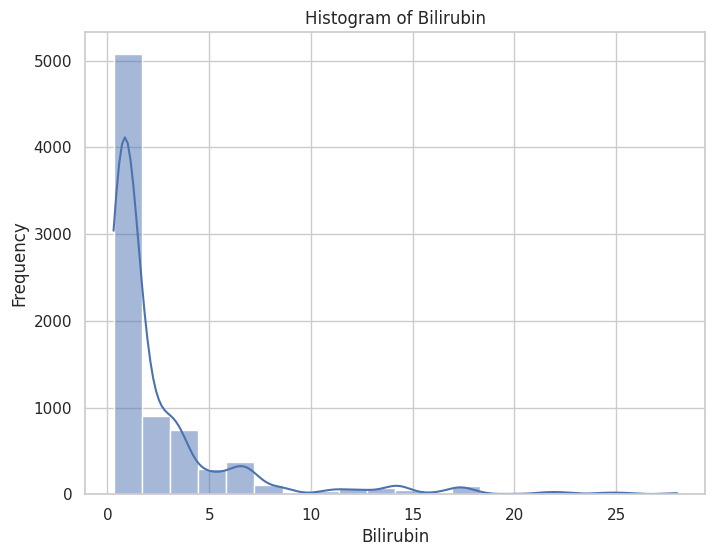

In [51]:
plotHistogram("Bilirubin")

* long tail on right, peak at 1

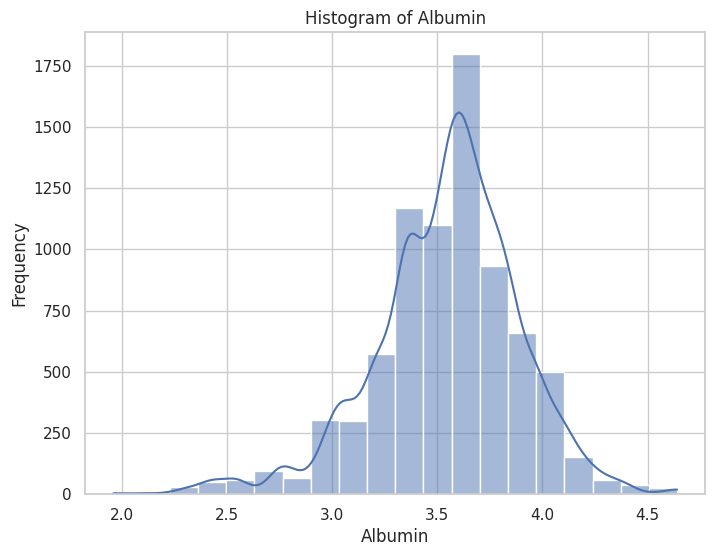

In [52]:
plotHistogram("Albumin")

* gaussian, mean around 3.7, longer left tail

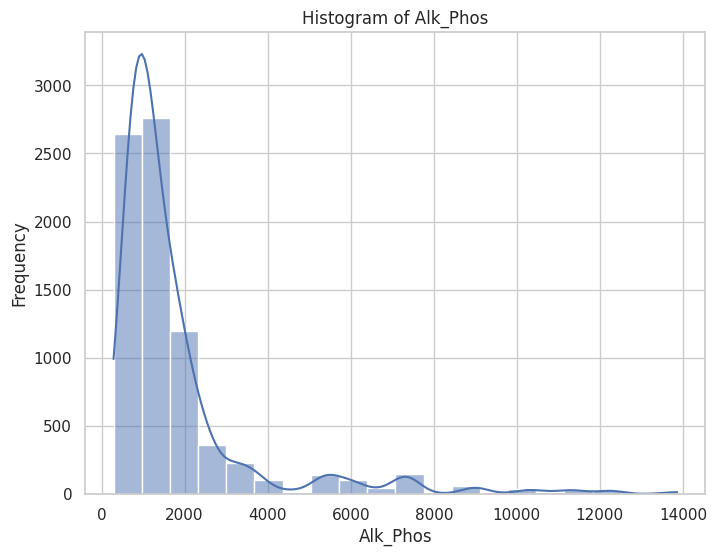

In [54]:
plotHistogram("Alk_Phos")

* long tail on right, peak at 1000

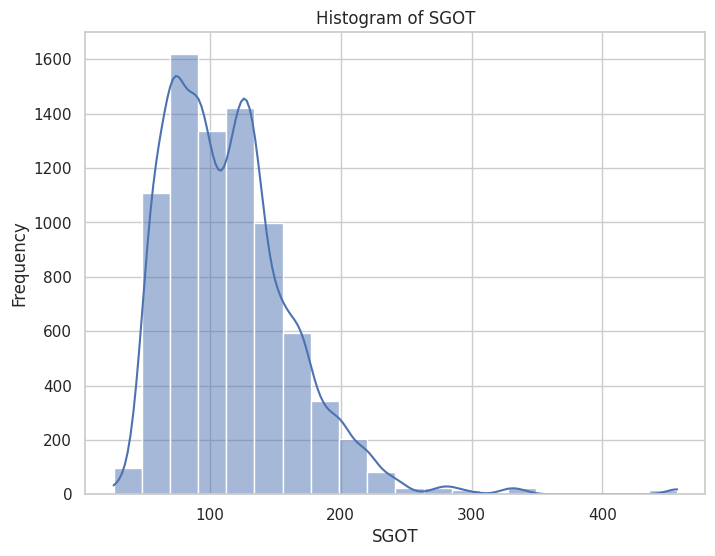

In [55]:
plotHistogram("SGOT")

* long tail in right, outliers past 400

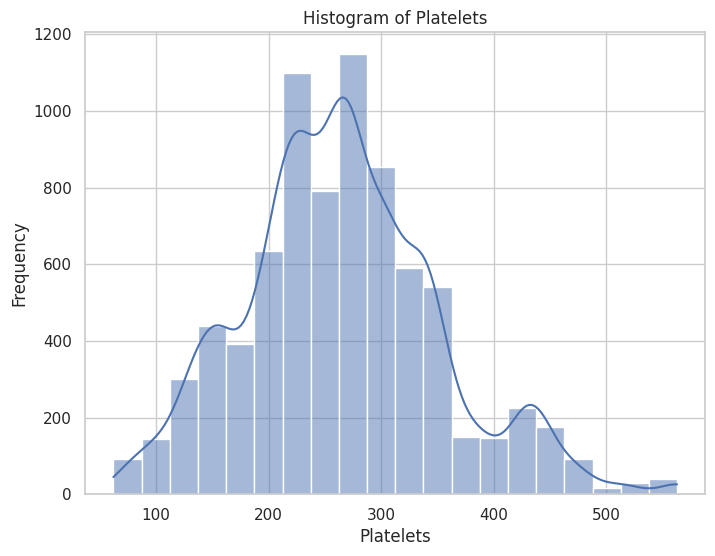

In [56]:
plotHistogram("Platelets")

* gaussian, mean around 250, longer right tail

## Checking the Order

In [64]:
def checkOrder(feature):
    indices = range(1, 7906)


    plt.figure(figsize=(10, 6))
    plt.scatter(indices, cirr_train['N_Days'], s=10, alpha=0.5)
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

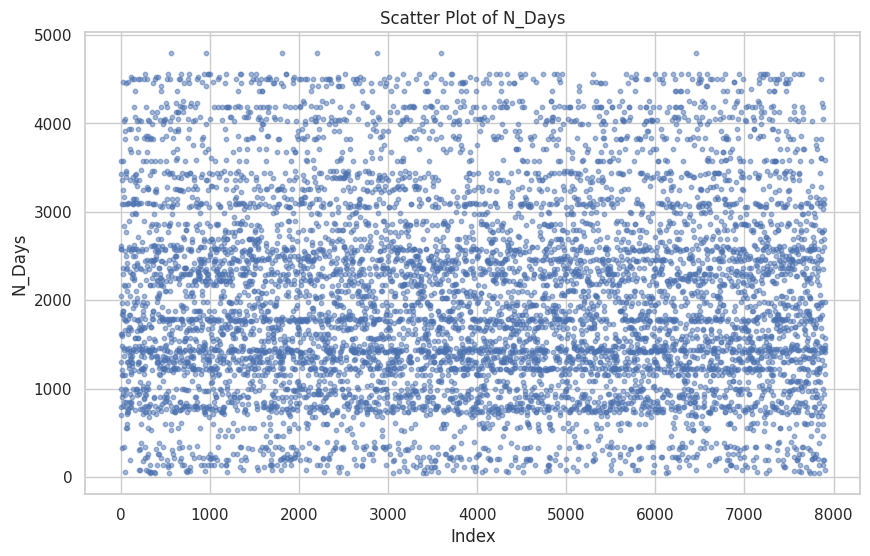

In [67]:
checkOrder("N_Days")

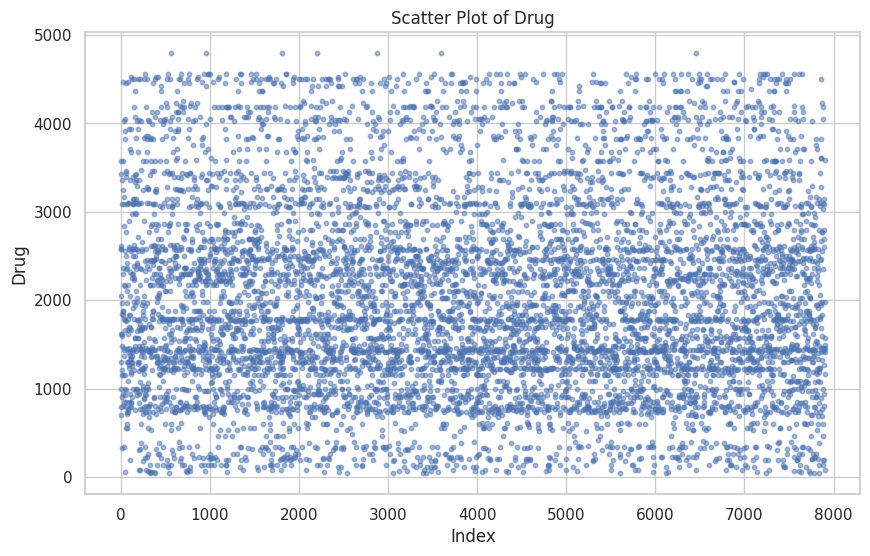

In [68]:
checkOrder("Drug")

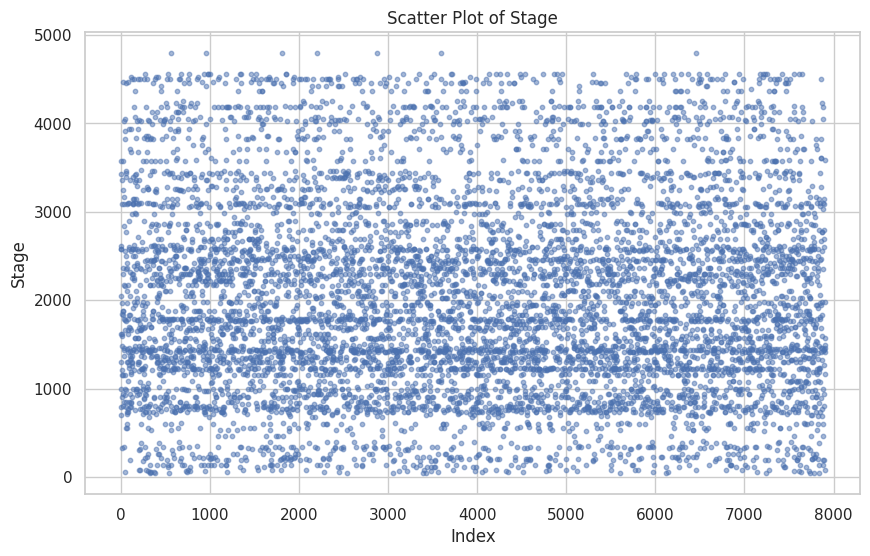

In [69]:
checkOrder("Stage")

Applies for all charts of Order:

there is no discernible info on order here

In [72]:
cirr_train.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [76]:
#  Pairplot didnt work for me

# pairs(~ Drug + Sex + Ascites + Hepatomegaly + Spiders + Edema + Stage, 
#       data = data,
#       main = "Training set of cirr data")

# pairs(~ Bilirubin + Albumin + Alk_Phos + SGOT + Prothrombin, 
#       data = data,
#       main = "Training set of cirr data")

# pairs(~ N_Days + Age + Cholesterol + Copper + Tryglicerides + Platelets, 
#       data = data,
#       main = "Training set of cirr data")

## Visualise Continous Feature vs Target

In [89]:
def plotFeatureAgainstTarget(feature):

    plt.figure(figsize=(8, 6))
    plt.scatter(cirr_train[f'{feature}'], cirr_train[f'Status'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()

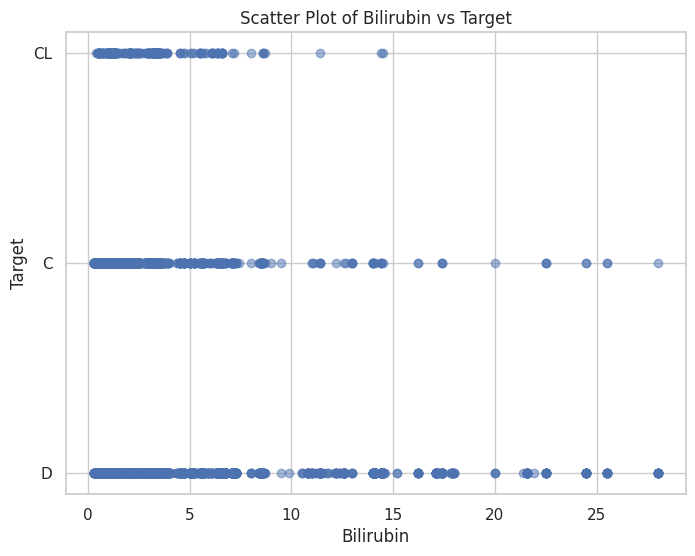

In [90]:
plotFeatureAgainstTarget("Bilirubin")

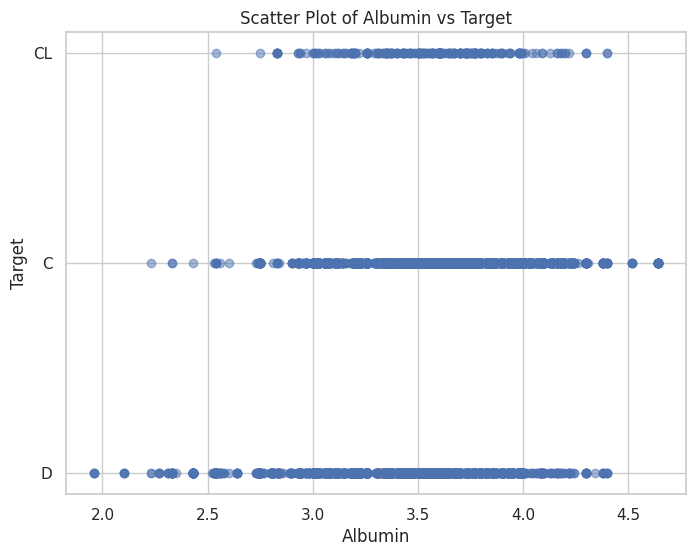

In [91]:
plotFeatureAgainstTarget("Albumin")

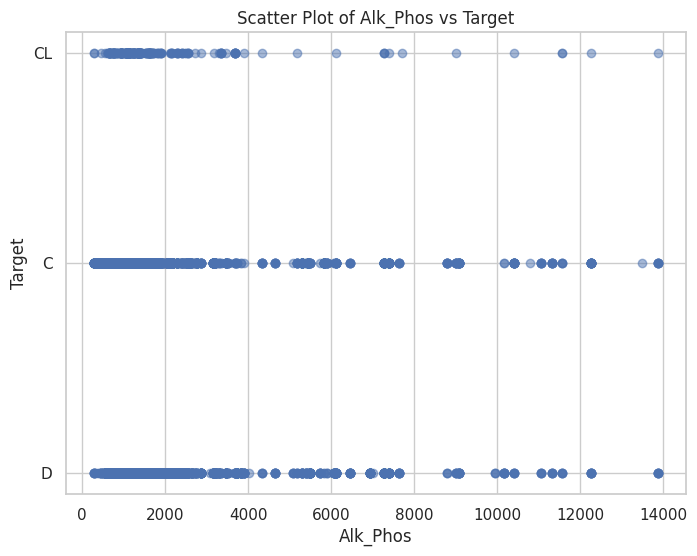

In [92]:
plotFeatureAgainstTarget("Alk_Phos")

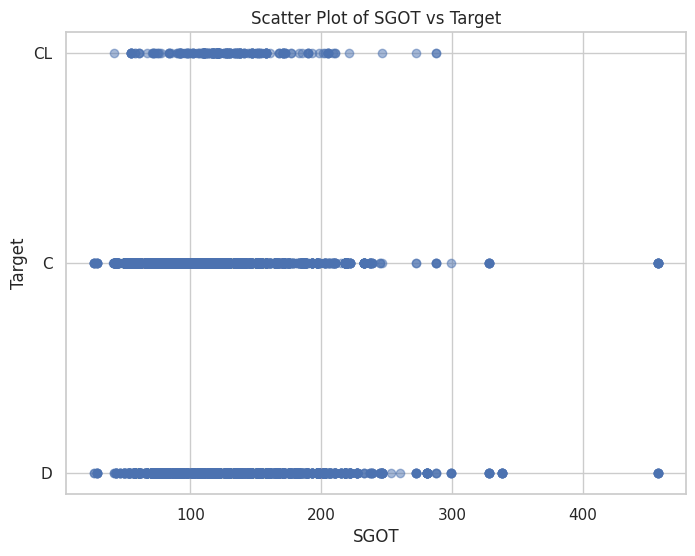

In [93]:
plotFeatureAgainstTarget("SGOT")

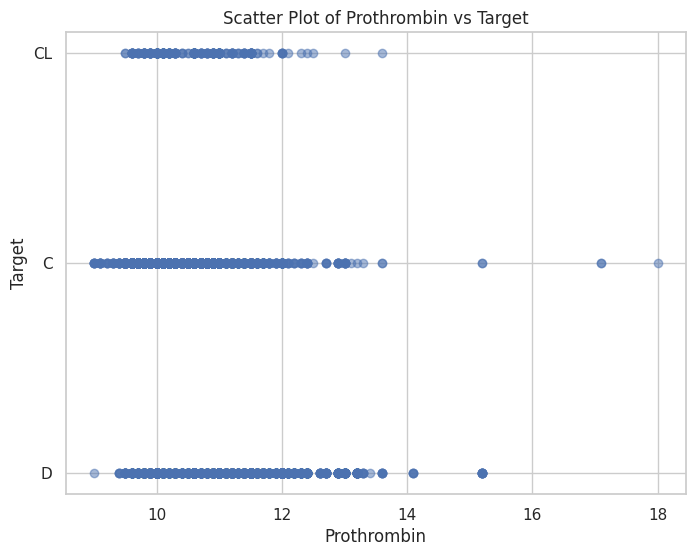

In [94]:
plotFeatureAgainstTarget("Prothrombin")

## Frequency of Categories

In [97]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Sex'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Sex                  F     M
Drug                        
D-penicillamine  45.34  3.53
Placebo          47.18  3.95


* less data for males

In [98]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Ascites'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Ascites              N     Y
Drug                        
D-penicillamine  46.73  2.14
Placebo          48.64  2.49


* Not balanced

In [101]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Hepatomegaly'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Hepatomegaly         N      Y
Drug                         
D-penicillamine  24.06  24.82
Placebo          24.15  26.98


* Balanced

In [102]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Spiders'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Spiders              N      Y
Drug                         
D-penicillamine  37.37  11.50
Placebo          37.98  13.15


* Less data for Spiders = Y

In [103]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Edema'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Edema                N     S     Y
Drug                              
D-penicillamine  44.58  2.35  1.94
Placebo          46.22  2.62  2.30


* Less data for Edema = Y and S

In [104]:
frequency = pd.crosstab(cirr_train['Drug'], cirr_test['Stage'])
percentage = (frequency.div(frequency.sum().sum()) * 100).round(2)

print(percentage)

Stage             1.0    2.0    3.0    4.0
Drug                                      
D-penicillamine  2.31  10.30  20.26  15.99
Placebo          2.24  10.89  20.00  18.00


* Unbalanced

## Correlation Matrix

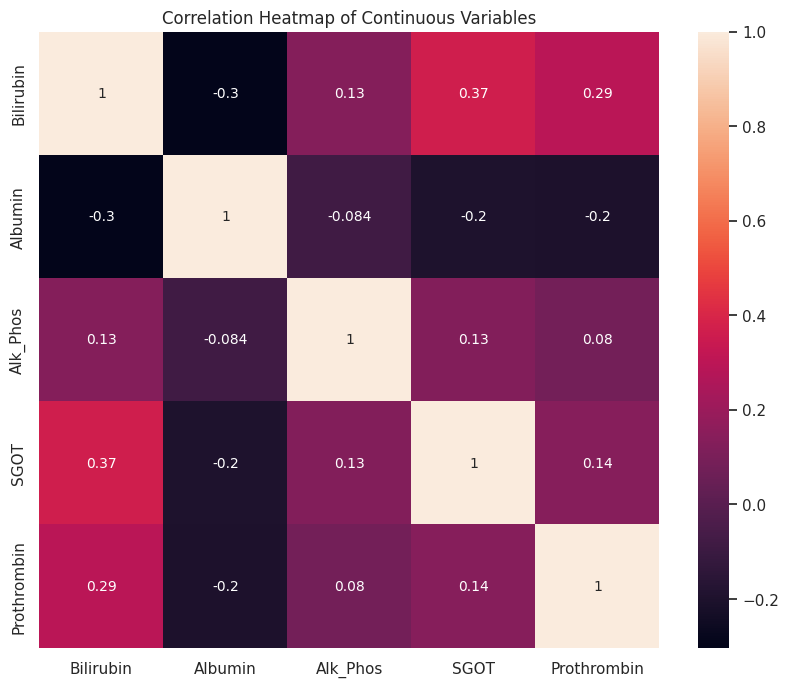

In [108]:
selected_columns_cont = cirr_train[["Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin"]]

correlation_matrix_cont = selected_columns_cont.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cont, annot=True,   annot_kws={"size": 10})
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

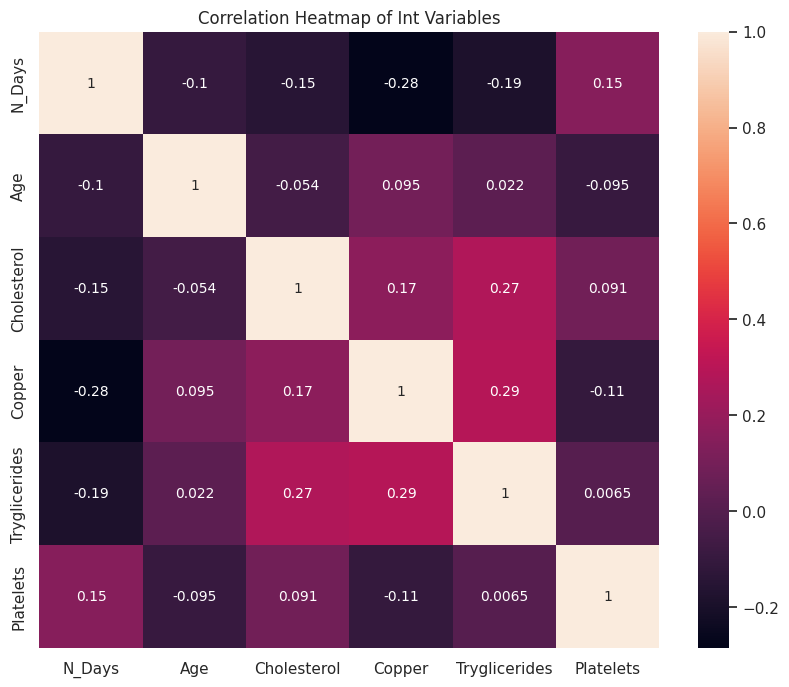

In [112]:
selected_columns_int = cirr_train[["N_Days","Age", "Cholesterol", "Copper", "Tryglicerides", 
                             "Platelets"]]

correlation_matrix_int = selected_columns_int.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_int, annot=True,   annot_kws={"size": 10})
plt.title('Correlation Heatmap of Int Variables')
plt.show()

# Data Imputation: Laila

| Explanation |
|--------|
| train.csv - the training dataset;  |
| Status is the categorical target      |
| C (censored) indicates the patient was alive at N_Days,    |
| CL indicates the patient was alive at N_Days due to liver a transplant      |
| D indicates the patient was deceased at N_Days.     |

In [119]:
#root_folder = os.getcwd()
#file_name = os.path.join(root_folder,"/Semester2/ID5059/Coursework2/Python Translation/data/train.csv)

train = pd.read_csv("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/Python Translation/data/train.csv")
train.drop(columns=["id"],inplace=True)
display(train)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


| Variable      | Description                                                                                                      |
|---------------|------------------------------------------------------------------------------------------------------------------|
| id            | A unique identifier for each patient.                                                                            |
| N_Days        | Number of days elapsed from a reference point.                                                                   |
| Drug          | The type of medication administered or used in treatment.                                                        |
| Age           | The age of the patient in years.                                                                                 |
| Sex           | The gender of the patient.                                                                                       |
| Ascites       | Presence or absence of ascites, an abnormal accumulation of fluid in the abdominal cavity.                       |
| Hepatomegaly  | Indicates whether there is hepatomegaly, which is the enlargement of the liver.                                  |
| Spiders       | Presence or absence of "spiders" (vascular lesions), which are skin lesions associated with liver diseases.      |
| Edema         | Presence or absence of edema, the accumulation of fluid in tissues.                                              |
| Bilirubin     | Levels of bilirubin in the blood.                                                                               |
| Cholesterol   | Levels of cholesterol in the blood.                                                                             |
| Albumin       | Levels of albumin in the blood.                                                                                  |
| Copper        | Levels of copper in the body.                                                                                   |
| Alk_Phos      | Levels of alkaline phosphatase in the blood.                                                                    |
| SGOT          | Levels of the enzyme aspartate aminotransferase (SGOT or AST) in the blood, an indicator of liver damage.       |
| Triglycerides | Levels of triglycerides in the blood.                                                                           |
| Platelets     | Quantity of platelets in the blood.                                                                             |
| Prothrombin   | Prothrombin time.                                                                                                |
| Stage         | The stage of the disease or medical condition of the patient.                                                    |
| Status        | The status of the patient, with values 'C' (Compensated), 'D' (Decompensated), or 'CL' (Controlled).            |


## Imputation

In [120]:
train_copy = train.copy()

np.random.seed(41) #random selections will be the same every time

for column in train_copy.columns:
    n_missing_values = np.random.randint(1, int(train_copy[column].size * 0.1))  # Randomly choose between 1% to 10% missing values
    random_indices = np.random.choice(train_copy.index, size=n_missing_values, replace=False)
    train_copy.loc[random_indices, column] = np.nan

train_copy

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999.0,D-penicillamine,21532.0,NaN,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574.0,Placebo,19237.0,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428.0,Placebo,13727.0,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576.0,Placebo,NaN,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788.0,Placebo,16658.0,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,D-penicillamine,16839.0,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492.0,Placebo,17031.0,F,N,Y,N,N,0.9,260.0,3.43,NaN,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576.0,D-penicillamine,25873.0,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584.0,D-penicillamine,22960.0,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,NaN,221.0,10.6,4.0,D


In [121]:
train_copy.isna().sum()

N_Days            81
Drug             522
Age              494
Sex              674
Ascites          198
Hepatomegaly     553
Spiders          752
Edema            624
Bilirubin        669
Cholesterol      260
Albumin          107
Copper           781
Alk_Phos          54
SGOT             466
Tryglicerides    614
Platelets        138
Prothrombin        5
Stage             51
Status           108
dtype: int64

| Type                      | Method                                      |
|---------------------------|---------------------------------------------|
| Missing Completely At Random | Mean, Median, Mode                      |
| Missing At Random           | Multiple imputation, Regression imputation |
| Missing Not At Random       | TPattern Substitution, Maximum Likelihood estimation |


In [122]:

numeric_cols = train_copy.select_dtypes(include=['number']).columns
non_numeric_cols = train_copy.select_dtypes(exclude=['number']).columns

imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

train_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)
train_imputed_median = pd.DataFrame(imputer_median.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)
train_imputed_most_frequent = pd.DataFrame(imputer_most_frequent.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)

for col in non_numeric_cols:
    most_frequent_value = train_copy[col].mode()[0]
    train_imputed_mean[col] = train_copy[col].fillna(most_frequent_value)
    train_imputed_median[col] = train_copy[col].fillna(most_frequent_value)
    train_imputed_most_frequent[col] = train_copy[col].fillna(most_frequent_value)

In [123]:
print("Imputed DataFrames using Mean strategy:")
display(train_imputed_mean)

Imputed DataFrames using Mean strategy:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,999.0,21532.000000,2.3,316.0,3.35,172.00000,1601.0,179.80,63.000000,394.0,9.7,3.0,D-penicillamine,F,N,N,N,N,D
1,2574.0,19237.000000,0.9,364.0,3.54,63.00000,1440.0,134.85,88.000000,361.0,11.0,3.0,Placebo,F,N,N,N,N,C
2,3428.0,13727.000000,3.3,299.0,3.55,131.00000,1029.0,119.35,50.000000,199.0,11.7,4.0,Placebo,F,N,Y,Y,Y,D
3,2576.0,18367.700445,0.6,256.0,3.50,58.00000,1653.0,71.30,96.000000,269.0,10.7,3.0,Placebo,F,N,N,N,N,C
4,788.0,16658.000000,1.1,346.0,3.65,63.00000,1181.0,125.55,96.000000,298.0,10.6,4.0,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.000000,0.8,309.0,3.56,38.00000,1629.0,79.05,224.000000,344.0,9.9,2.0,D-penicillamine,F,N,N,N,N,C
7901,1492.0,17031.000000,0.9,260.0,3.43,84.56457,1440.0,142.00,78.000000,277.0,10.0,4.0,Placebo,F,N,Y,N,N,C
7902,1576.0,25873.000000,2.0,225.0,3.19,51.00000,933.0,69.75,62.000000,200.0,12.7,2.0,D-penicillamine,F,N,N,Y,S,D
7903,3584.0,22960.000000,0.7,248.0,2.75,32.00000,1003.0,57.35,115.238788,221.0,10.6,4.0,D-penicillamine,M,N,Y,N,N,D


In [124]:
print("Imputed DataFrames using Median strategy:")
display(train_imputed_median)

Imputed DataFrames using Median strategy:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,999.0,21532.0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D-penicillamine,F,N,N,N,N,D
1,2574.0,19237.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,Placebo,F,N,N,N,N,C
2,3428.0,13727.0,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,Placebo,F,N,Y,Y,Y,D
3,2576.0,18713.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,Placebo,F,N,N,N,N,C
4,788.0,16658.0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,D-penicillamine,F,N,N,N,N,C
7901,1492.0,17031.0,0.9,260.0,3.43,64.0,1440.0,142.00,78.0,277.0,10.0,4.0,Placebo,F,N,Y,N,N,C
7902,1576.0,25873.0,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D-penicillamine,F,N,N,Y,S,D
7903,3584.0,22960.0,0.7,248.0,2.75,32.0,1003.0,57.35,104.0,221.0,10.6,4.0,D-penicillamine,M,N,Y,N,N,D


In [125]:
print("Imputed DataFrames using Most Frequent strategy:")
display(train_imputed_most_frequent)

Imputed DataFrames using Most Frequent strategy:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,999.0,21532.0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D-penicillamine,F,N,N,N,N,D
1,2574.0,19237.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,Placebo,F,N,N,N,N,C
2,3428.0,13727.0,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,Placebo,F,N,Y,Y,Y,D
3,2576.0,22369.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,Placebo,F,N,N,N,N,C
4,788.0,16658.0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,D-penicillamine,F,N,N,N,N,C
7901,1492.0,17031.0,0.9,260.0,3.43,67.0,1440.0,142.00,78.0,277.0,10.0,4.0,Placebo,F,N,Y,N,N,C
7902,1576.0,25873.0,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D-penicillamine,F,N,N,Y,S,D
7903,3584.0,22960.0,0.7,248.0,2.75,32.0,1003.0,57.35,90.0,221.0,10.6,4.0,D-penicillamine,M,N,Y,N,N,D


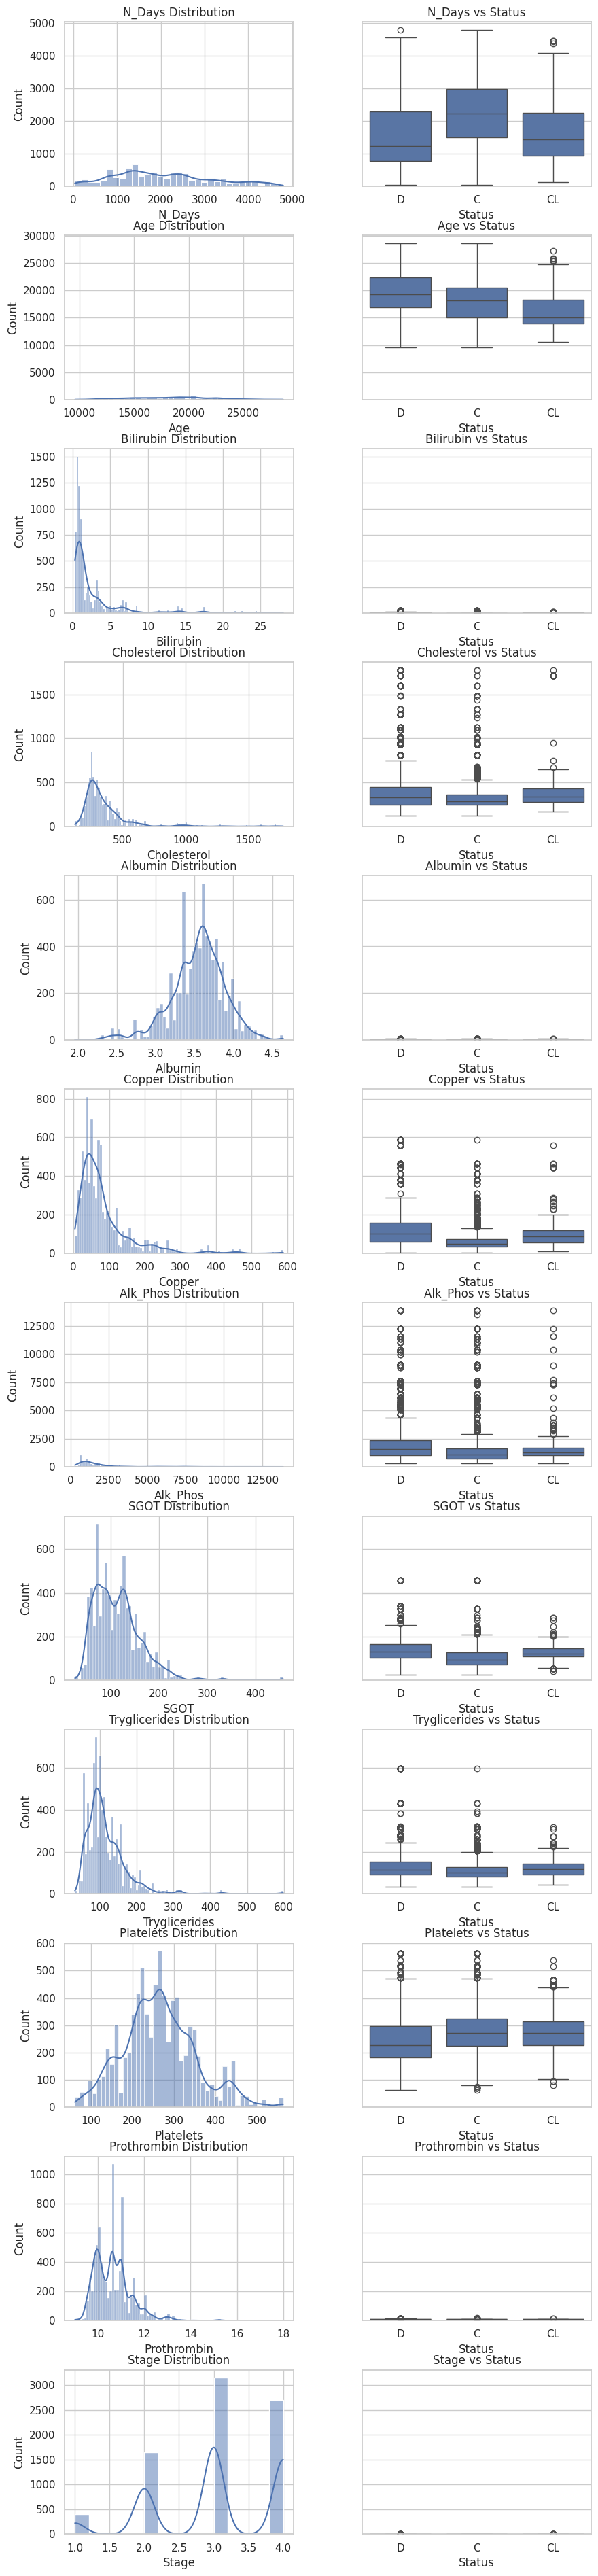

In [126]:


numerical_cols = []
for col in train.columns:
    if train[col].dtype != 'O' and train[col].nunique() > 2 and col != 'Status':
        numerical_cols.append(col)
        
n_rows = len(numerical_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows), sharey='row', gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])
for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'{col} Distribution')

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train['Status'], y=train[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'{col} vs Status')

plt.show()

# Data Balancing

  check col's type

In [128]:
original_data = pd.read_csv("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/Python Translation/data/train.csv")
original_data.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [129]:


"""
     lets check the train_imputed_mean's unbalanced cols here
     maybe be duplicated with Meagan's part u can delete it at last
     Unbalanced Results: 
                         Sex(F/M:92/8), Ascites(N/Y:95/5), Spiders(N/Y:75/25), 
                                Edema(90/5/5:N/S/Y), Status(C/D/CL:62/33/5)  ——object
                         
                         Bilirubin, cholesterol, copper, Alk_Phos, SGOT(slight) —— right skewed float64
                         
                         Stage(slight) —— left skewed float64
"""

"\n     lets check the train_imputed_mean's unbalanced cols here\n     maybe be duplicated with Meagan's part u can delete it at last\n     Unbalanced Results: \n                         Sex(F/M:92/8), Ascites(N/Y:95/5), Spiders(N/Y:75/25), \n                                Edema(90/5/5:N/S/Y), Status(C/D/CL:62/33/5)  ——object\n                         \n                         Bilirubin, cholesterol, copper, Alk_Phos, SGOT(slight) —— right skewed float64\n                         \n                         Stage(slight) —— left skewed float64\n"

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is d

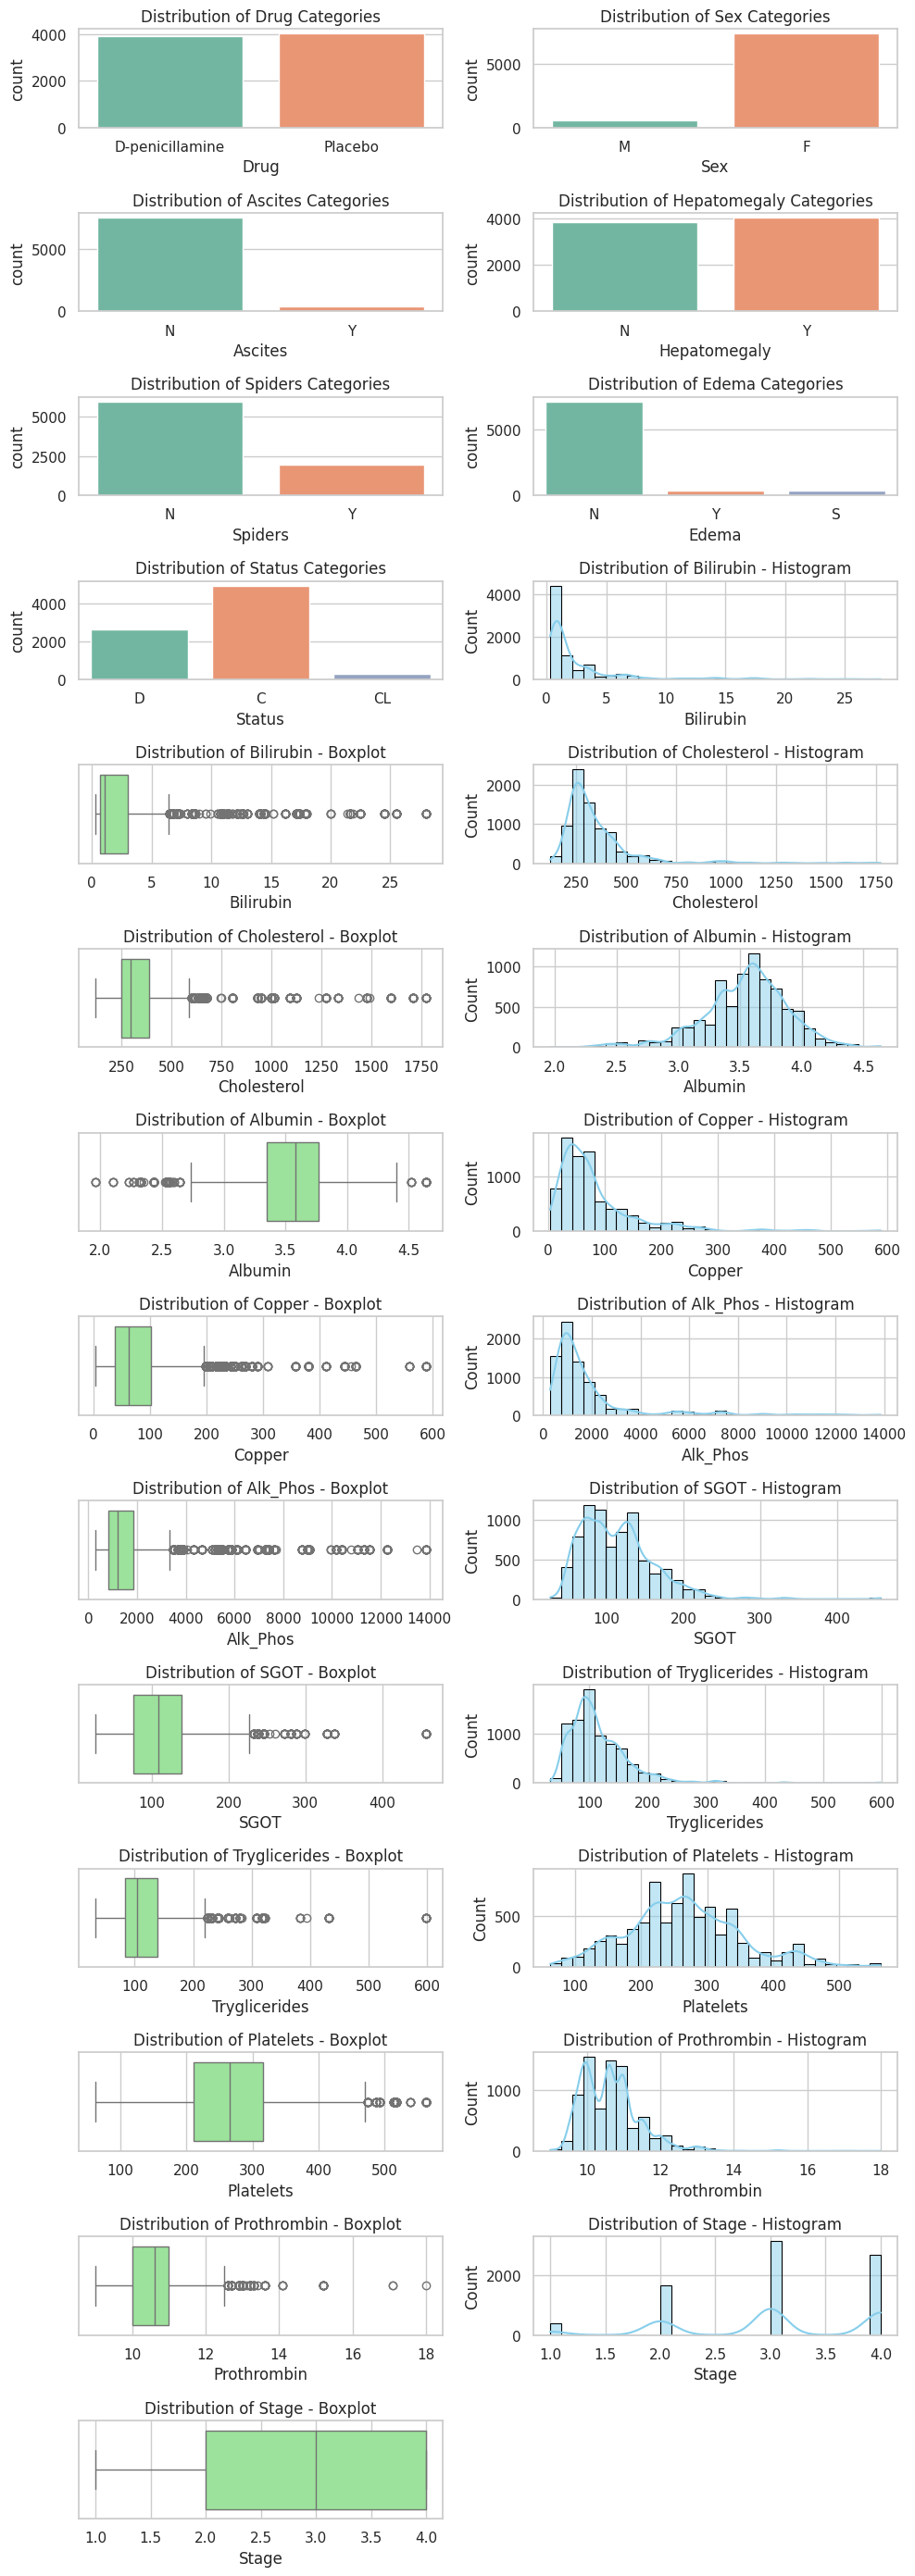

In [130]:
def visualise_distribution(data):
    
    sns.set(style="whitegrid")

    categorical_columns = [col for col in data.columns 
                if (data[col].dtype == 'object') or (data[col].dtype == 'bool')]
    float_columns = [col for col in data.columns if data[col].dtype == 'float64']

    total_plots = len(categorical_columns) + 2 * len(float_columns)

    n_rows = (total_plots + 1) // 2

    plt.figure(figsize=(10, 2 * n_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, 2, i)
        sns.countplot(x=col, data=data, palette='Set2')
        plt.title(f'Distribution of {col} Categories')

    for j, col in enumerate(float_columns, 1):
        index = len(categorical_columns) + 2 * j - 1  

        plt.subplot(n_rows, 2, index)
        sns.histplot(data[col], kde=True, color='skyblue', bins=30, edgecolor='black')
        plt.title(f'Distribution of {col} - Histogram')

        plt.subplot(n_rows, 2, index + 1)
        sns.boxplot(x=data[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')

    plt.tight_layout()
    plt.show()
visualise_distribution(original_data)

In [131]:

"""
    Balancing predictor column 'Status'
    log handles the severely right-skewed four-column explanatory variables of 
        'Bilirubin', 'Cholesterol', 'Copper', and 'Alk_Phos'
        
    PS: (if u met Nonetype cannot split problems, 
        uninstall threadpoolctl and then pip install threadpoolctl==3.1.0)
"""

X_original = original_data.drop('Status', axis=1)
y_original = original_data['Status']

# Log processing of numerical variables can alleviate the right skew problem
epsilon = 1e-6
log_transform_vars = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos']
for var in log_transform_vars:
    X_original[var] = np.log(X_original[var] + epsilon)

# Perform one hot encoder hot encoding c processing on the explanatory variables
X_original_encoded = pd.get_dummies(X_original)

# Convert categorical target variable to numeric value
label_encoder = LabelEncoder()
y_original_encoded = label_encoder.fit_transform(y_original)

### SMOTE

#### explain briefly what SMOTE does to create the balance

In [132]:

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_original_encoded, y_original_encoded)
y_resampled_labels_smote = label_encoder.inverse_transform(y_resampled_smote)

X_resampled_smote = pd.DataFrame(X_resampled_smote, columns= X_original_encoded.columns)
y_resampled_smote = pd.DataFrame(y_resampled_labels_smote, columns=['Status'])

train_balanced_smote = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
train_balanced_smote = train_balanced_smote.dropna()

### ADASYN

ADASYN (Adaptive Synthetic Sampling): 
 * but takes into account the density of the sample distribution when 
 * generating synthetic samples. This means that for minority class samples
 * in boundary areas. Hence it will generate more synthetic samples.e

In [133]:
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_original_encoded, y_original_encoded)
y_resampled_labels_adasyn = label_encoder.inverse_transform(y_resampled_adasyn)

X_resampled_adasyn = pd.DataFrame(X_resampled_adasyn, columns=X_original_encoded.columns)
y_resampled_adasyn = pd.DataFrame(y_resampled_labels_adasyn, columns=['Status'])


train_balanced_adasyn = pd.concat([X_resampled_adasyn, y_resampled_adasyn], axis=1)
train_balanced_adasyn = train_balanced_adasyn.dropna()

### Function to sample the data for the model

In [134]:
def balance_adasyn(X,y):
    adasyn = ADASYN(random_state=42)
    X_train, y_train = adasyn.fit_resample(X,y)

    return X_train,y_train

In [135]:
def balance_smote(X,y):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X,y)

    return X_train,y_train

Class distribution after resampling: Counter({'CL': 4984, 'C': 4965, 'D': 4809})
id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine       bool
Drug_Placebo               bool
Sex_F                      bool
Sex_M                      bool
Ascites_N                  bool
Ascites_Y                  bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Spiders_N                  bool
Spiders_Y                  bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Status                   object
dtype: object


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,True,False,True,False,True,False,True,False,False,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,True,False,True,False,True,False,True,False,False,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,True,False,False,True,False,True,False,False,True,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,True,False,True,False,True,False,True,False,False,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,True,False,False,True,True,False,True,False,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,7829,1322,12572,0.931433,6.062240,3.589729,4.702568,7.024287,137.520989,77.413278,...,True,False,False,True,True,False,True,False,False,D
14754,7852,1329,12909,0.975990,6.205997,3.479832,4.399457,7.232947,139.816972,132.576709,...,True,False,False,True,True,False,True,False,False,D
14755,7323,1256,24765,-0.029325,6.193222,3.246130,4.467016,7.482631,145.227770,139.078685,...,True,False,True,True,True,False,True,False,False,D
14756,7831,1512,25823,0.573249,5.559830,3.266578,3.968247,6.972308,74.637501,68.006146,...,True,False,True,True,True,True,True,True,False,D


/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is d

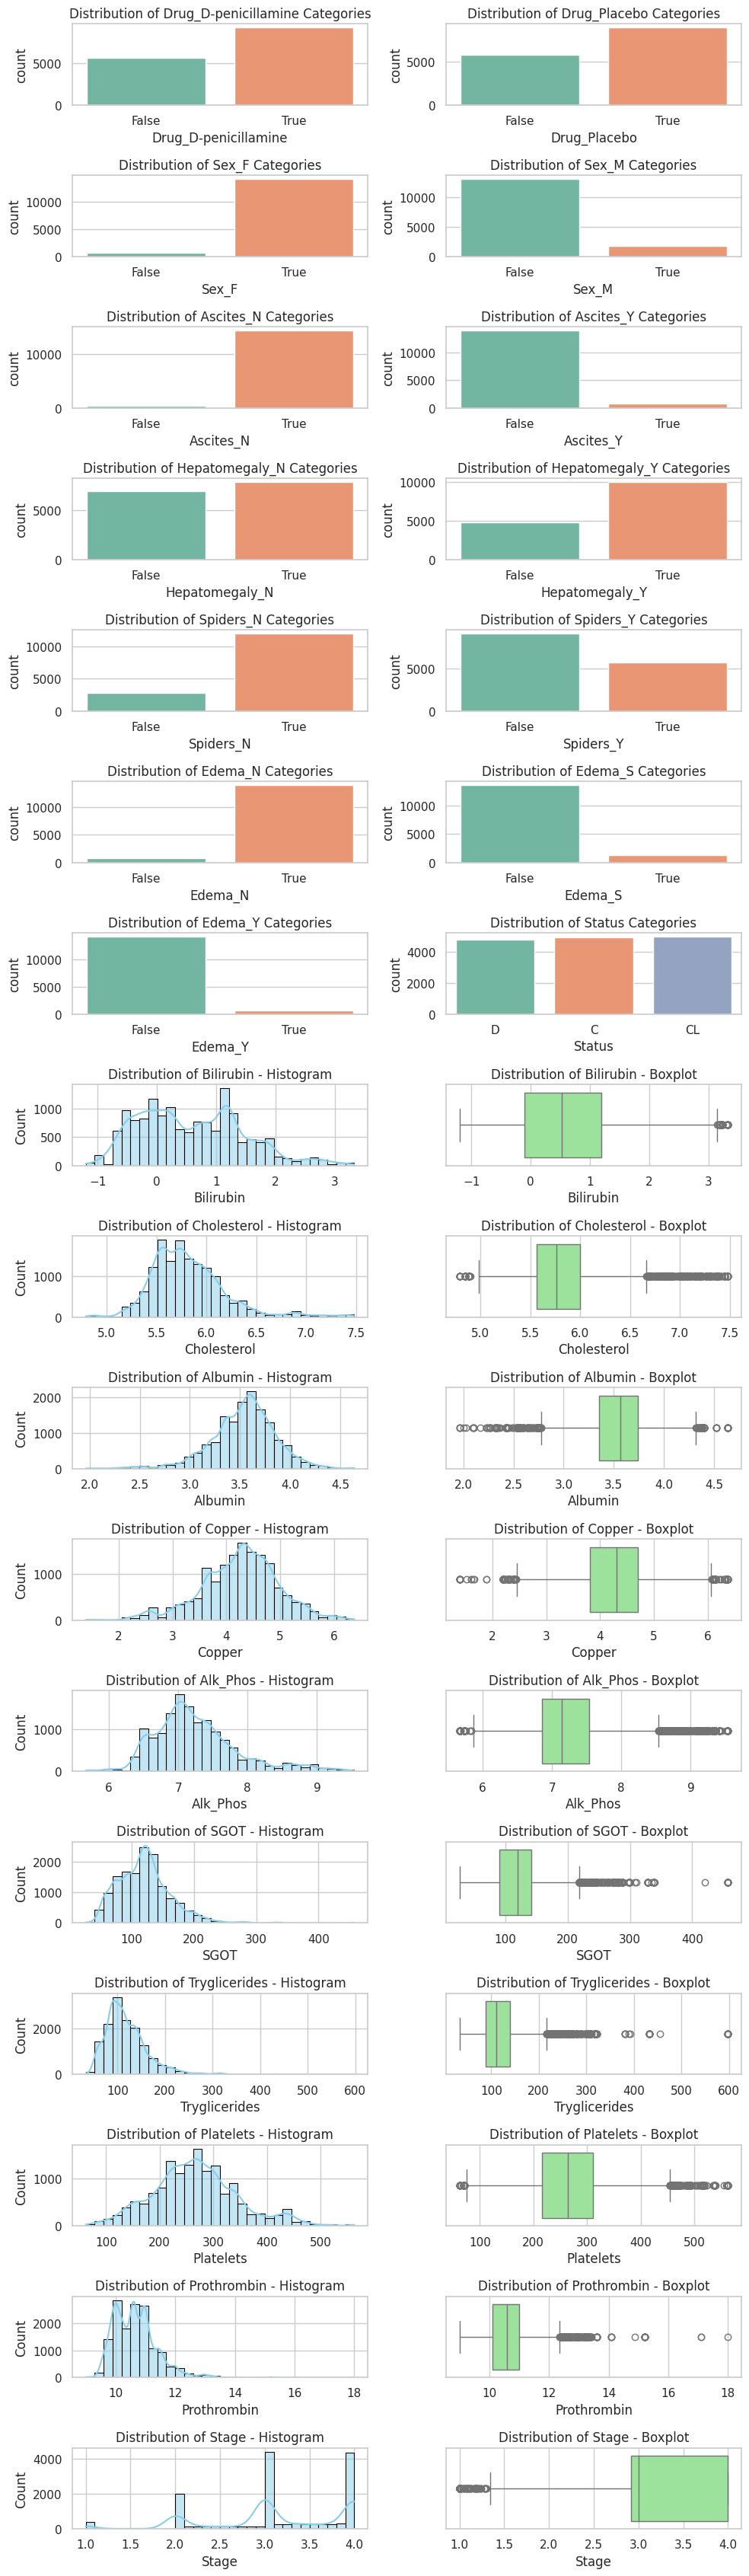

In [136]:
from collections import Counter

print('Class distribution after resampling:', Counter(y_resampled_labels_adasyn))
print(train_balanced_adasyn.dtypes)
display(train_balanced_adasyn)
visualise_distribution(train_balanced_adasyn)


Class distribution after resampling: Counter({'D': 4965, 'C': 4965, 'CL': 4965})
id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine       bool
Drug_Placebo               bool
Sex_F                      bool
Sex_M                      bool
Ascites_N                  bool
Ascites_Y                  bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Spiders_N                  bool
Spiders_Y                  bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Status                   object
dtype: object


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,True,False,True,False,True,False,True,False,False,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,True,False,True,False,True,False,True,False,False,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,True,False,False,True,False,True,False,False,True,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,True,False,True,False,True,False,True,False,False,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,True,False,False,True,True,False,True,False,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,2046,203,21331,1.162723,5.773460,3.428737,4.137945,6.861651,94.712000,101.480001,...,True,True,False,True,False,True,True,False,True,D
14891,6655,1486,18614,1.052372,5.585663,3.849060,4.345913,7.273779,98.173174,152.817264,...,True,False,False,True,True,True,True,False,False,D
14892,7227,626,20293,2.297562,6.303121,3.700000,4.760824,7.903020,140.682780,121.547718,...,True,False,False,True,True,True,True,False,True,D
14893,6115,1452,17787,0.239987,5.398274,3.769767,4.218847,7.028956,156.768624,72.886185,...,True,False,True,True,True,False,True,False,False,D


/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipykernel_3368936/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is d

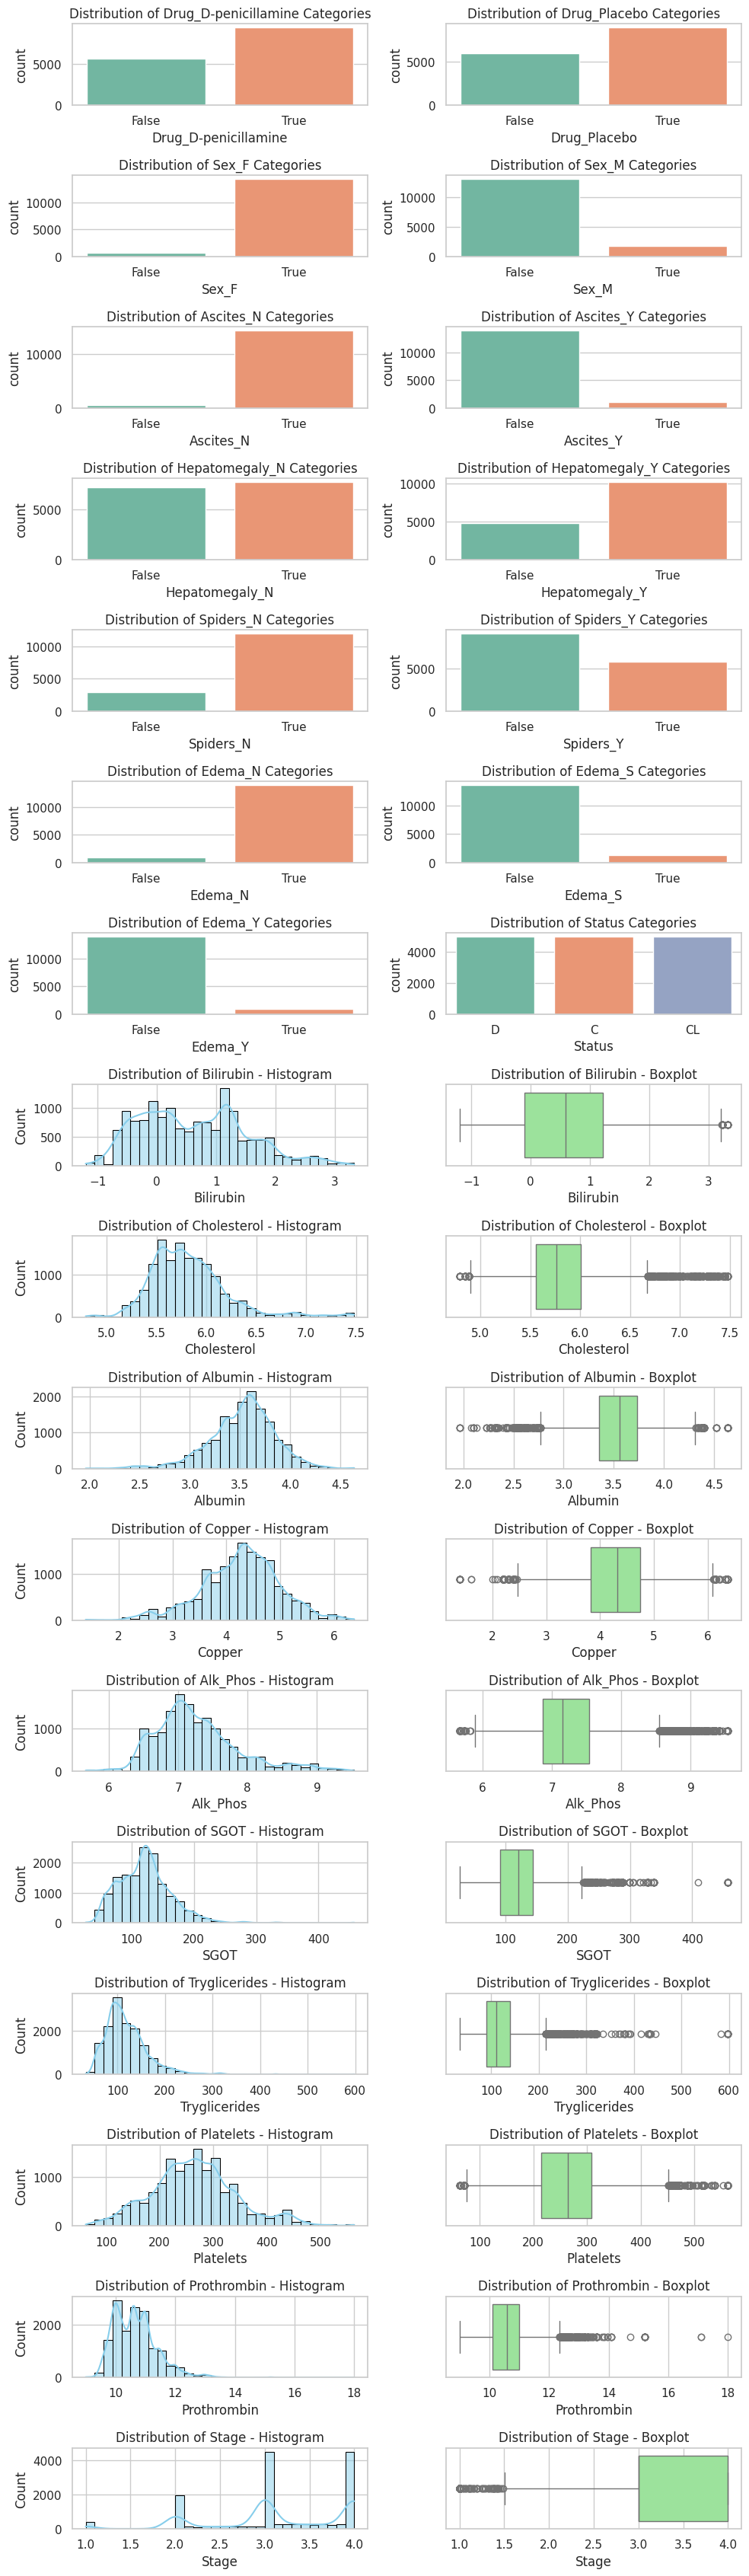

In [137]:

print('Class distribution after resampling:', Counter(y_resampled_labels_smote))
print(train_balanced_smote.dtypes)
display(train_balanced_smote)
visualise_distribution(train_balanced_smote)

# Feature Engineering

I converted the bool column in train_imputed_balanced to int for similarity calculation.
    If you need bool type, you can copy train_imputed_balanced at the end of part A.

In [138]:
encoded_smote = train_balanced_smote * 1

display(encoded_smote)
print(encoded_smote.dtypes)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,1,0,1,0,1,0,1,0,0,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,1,0,1,0,1,0,1,0,0,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,1,0,0,1,0,1,0,0,1,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,1,0,1,0,1,0,1,0,0,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,1,0,0,1,1,0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,2046,203,21331,1.162723,5.773460,3.428737,4.137945,6.861651,94.712000,101.480001,...,1,1,0,1,0,1,1,0,1,D
14891,6655,1486,18614,1.052372,5.585663,3.849060,4.345913,7.273779,98.173174,152.817264,...,1,0,0,1,1,1,1,0,0,D
14892,7227,626,20293,2.297562,6.303121,3.700000,4.760824,7.903020,140.682780,121.547718,...,1,0,0,1,1,1,1,0,1,D
14893,6115,1452,17787,0.239987,5.398274,3.769767,4.218847,7.028956,156.768624,72.886185,...,1,0,1,1,1,0,1,0,0,D


id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine      int64
Drug_Placebo              int64
Sex_F                     int64
Sex_M                     int64
Ascites_N                 int64
Ascites_Y                 int64
Hepatomegaly_N            int64
Hepatomegaly_Y            int64
Spiders_N                 int64
Spiders_Y                 int64
Edema_N                   int64
Edema_S                   int64
Edema_Y                   int64
Status                   object
dtype: object


In [139]:
encoded_adasyn = train_balanced_adasyn * 1

display(encoded_adasyn)
print(encoded_adasyn.dtypes)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,1,0,1,0,1,0,1,0,0,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,1,0,1,0,1,0,1,0,0,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,1,0,0,1,0,1,0,0,1,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,1,0,1,0,1,0,1,0,0,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,1,0,0,1,1,0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,7829,1322,12572,0.931433,6.062240,3.589729,4.702568,7.024287,137.520989,77.413278,...,1,0,0,1,1,0,1,0,0,D
14754,7852,1329,12909,0.975990,6.205997,3.479832,4.399457,7.232947,139.816972,132.576709,...,1,0,0,1,1,0,1,0,0,D
14755,7323,1256,24765,-0.029325,6.193222,3.246130,4.467016,7.482631,145.227770,139.078685,...,1,0,1,1,1,0,1,0,0,D
14756,7831,1512,25823,0.573249,5.559830,3.266578,3.968247,6.972308,74.637501,68.006146,...,1,0,1,1,1,1,1,1,0,D


id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine      int64
Drug_Placebo              int64
Sex_F                     int64
Sex_M                     int64
Ascites_N                 int64
Ascites_Y                 int64
Hepatomegaly_N            int64
Hepatomegaly_Y            int64
Spiders_N                 int64
Spiders_Y                 int64
Edema_N                   int64
Edema_S                   int64
Edema_Y                   int64
Status                   object
dtype: object


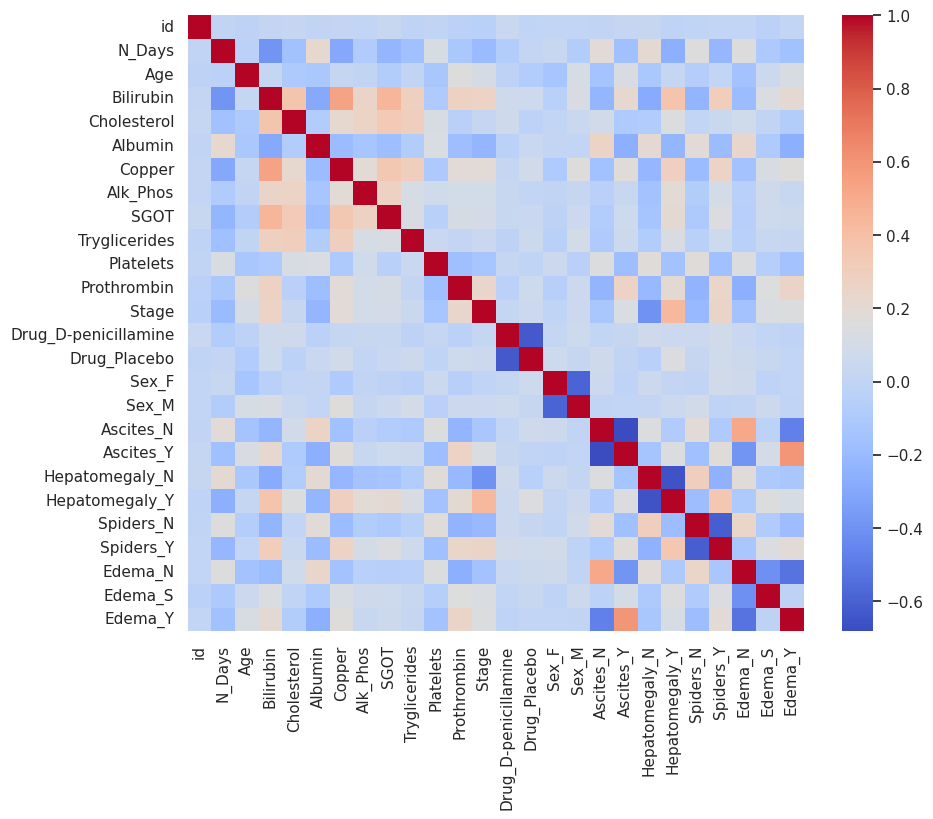

In [140]:
features = train_balanced_adasyn.drop('Status', axis=1)
corr_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.show()

Delete independent variables with pearson correlation greater than 0.8.
There are no highly correlated variables, fine.

In [142]:
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Pearson coefficient between feature' {pair[0]} 'and' {pair[1]} 'is: {pair[2]:.2f}")

Pearson coefficient between feature' Drug_Placebo 'and' Drug_D-penicillamine 'is: -0.63
Pearson coefficient between feature' Ascites_Y 'and' Ascites_N 'is: -0.68
Pearson coefficient between feature' Hepatomegaly_Y 'and' Hepatomegaly_N 'is: -0.65
Pearson coefficient between feature' Spiders_Y 'and' Spiders_N 'is: -0.62


  Feature selection using Recursive Feature Elimination (RFE) based on Random Forest model

In [144]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectFromModel

# # train_imputed_balanced DataFrame，'Status'
# X_sampled = train_balanced_adasyn.drop('Status', axis=1)
# y_sampled = train_balanced_adasyn['Status']

# # split X, y for the next fitting process
# X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# # initialise Random Forest model
# base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # RFE model
# '''
#     Important: Adjust the number of returned features here.
# '''
# rfe = RFE(estimator=base_model, n_features_to_select=10)  

# rfe.fit(X_train_sampled, y_train_sampled)

# # check features from rfe
# selected_features = X_train_sampled.columns[rfe.support_]

# print("The finally selected features are：", selected_features)

# Modelling

In [145]:
raw_data = pd.read_csv("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/Python Translation/data/train.csv")

## Creating the pipeline

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [147]:
numerical_features = ["N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin", "Stage"]
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]


In [148]:
def transform_data(X):
    return X

def clean_and_prep(data):
    data = data.drop(columns=["id"])
    data = transform_data(data)
    return data

full_pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_features),
    ("categorical", OneHotEncoder(sparse_output=False), categorical_features)
])

full_pipeline.set_output(transform="pandas")

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output = False)






Prepare the original data

In [149]:
y_train_original = raw_data["Status"]
X_original = raw_data.drop(columns=["Status"])
cleaned_data = clean_and_prep(X_original)
X_train_original = full_pipeline.fit_transform(cleaned_data)

Prepare the smote sampled dataset

In [150]:
X_train_smote, y_train_smote = balance_smote(X_train_original, y_train_original)

Prepare the adasyn sampled dataset

In [152]:

X_train_adasyn, y_train_adasyn = balance_adasyn(X_train_original, y_train_original)

Prepare the imputed dataset

In [154]:
# y_train_imputed = train_imputed_mean["Status"]
# X_imputed = train_imputed_mean.drop(columns=["Status"])
# cleaned_data = clean_and_prep(X_imputed)
# X_train_imputed = full_pipeline.fit_transform(cleaned_data)

## Create Models

### Create a model to compare different data sets

| Dataset | Explanation | 
|----------|----------|
|  X_train_original, y_train_original      |  original dataset |
|  X_train_sampled, y_train_sampled      |  ADASYN balanced dataset |
| X_train_imputed, y_train_imputed    | imputed dataset

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

Fit the model with the different data sets

In [156]:
randomForest = RandomForestClassifier(random_state=42, criterion="log_loss")
randomForest_original = randomForest.fit(X_train_original, y_train_original)
randomForest_smote = randomForest.fit(X_train_smote, y_train_smote)
randomForest_adasyn = randomForest.fit(X_train_adasyn, y_train_adasyn)


Cross validation

In [157]:
randomForest_original_pred = cross_val_predict(randomForest_original, X_train_original, y_train_original, cv=3 )
randomForest_smote_pred = cross_val_predict(randomForest_smote, X_train_smote, y_train_smote, cv = 3 )
randomForest_adasyn_pred = cross_val_predict(randomForest_adasyn, X_train_adasyn, y_train_adasyn, cv=3 )

create the confusion matrixes for the different results

In [158]:
def plotConfusionMatrix(y_train, prediction, title):
    
    cm_rf = confusion_matrix(y_train, prediction)


    %matplotlib inline
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_rf, annot=True, fmt="g")
    #plt.title(f'Confusion Matrix for {title}')
    plt.xlabel("Predicted")
    plt.ylabel("True Value")

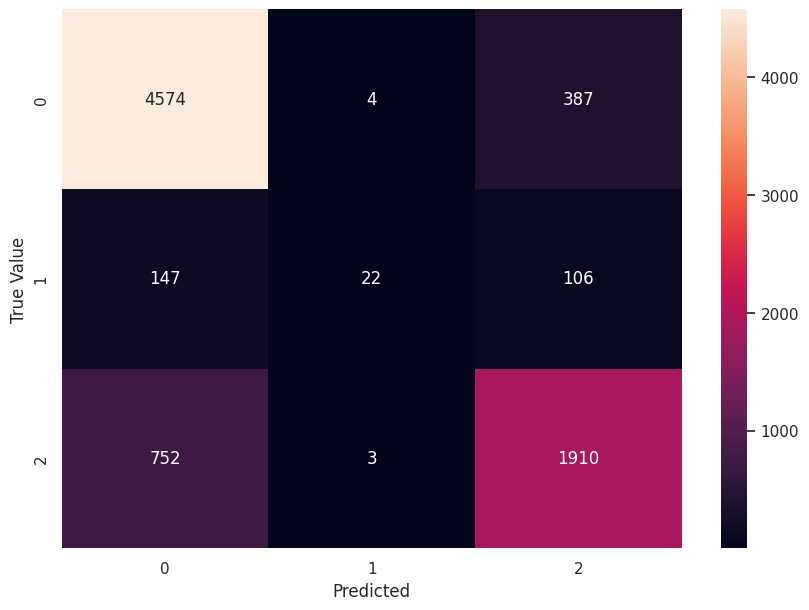

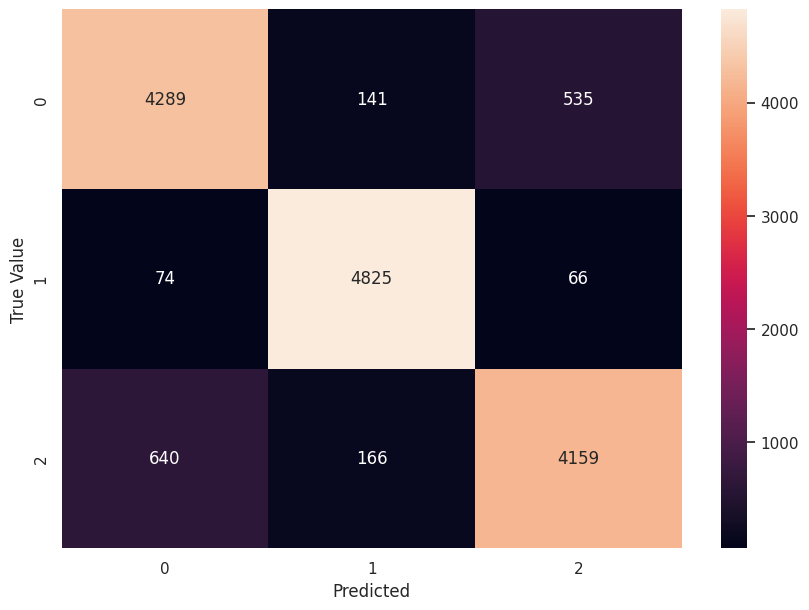

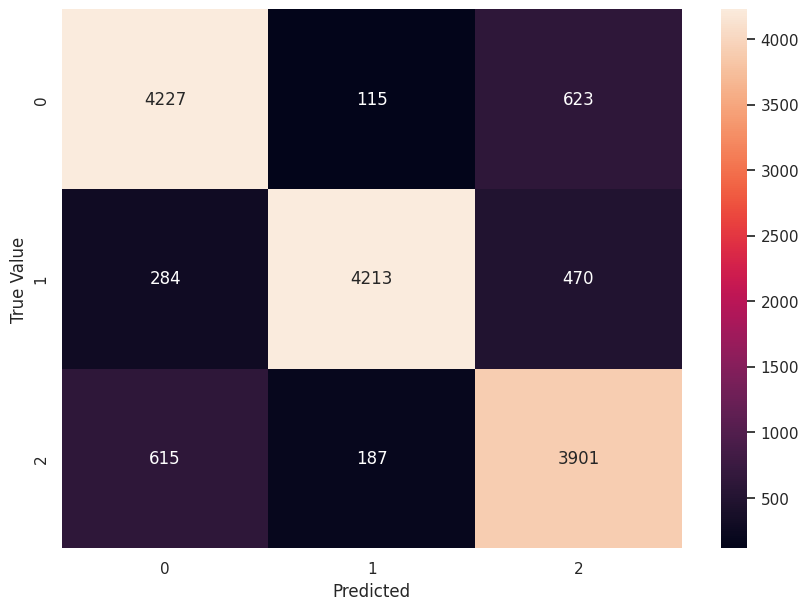

In [159]:
plotConfusionMatrix(y_train_original, randomForest_original_pred, "Original Dataset")
plotConfusionMatrix(y_train_smote, randomForest_smote_pred, "Dataset balanced with SMOTE")
plotConfusionMatrix(y_train_adasyn, randomForest_adasyn_pred, "Dataset balanced with adasyn")

## Plot the roc-curve for the different models

In [160]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

In [161]:
randomForest_original_pred = cross_val_predict(randomForest_original, X_train_original, y_train_original, cv=3, method="predict_proba" )
randomForest_smote_pred = cross_val_predict(randomForest_smote, X_train_smote, y_train_smote, cv = 3, method="predict_proba" )
randomForest_adasyn_pred = cross_val_predict(randomForest_adasyn, X_train_adasyn, y_train_adasyn, cv=3, method="predict_proba")

In [162]:
label_binarizer = LabelBinarizer().fit(y_train_original)
y_onehot_test = label_binarizer.transform(y_train_original)

In [163]:
class_target = "CL"
class_id = np.flatnonzero(label_binarizer.classes_ == class_target)[0]
class_id

1

In [164]:
print(f"randomForest: {randomForest_original_pred.shape}")
print(f"onehot_test: {y_onehot_test.shape}")
print(class_id)

randomForest: (7905, 3)
onehot_test: (7905, 3)
1


In [165]:
randomForest_original_pred

array([[0.19, 0.12, 0.69],
       [0.75, 0.  , 0.25],
       [0.  , 0.  , 1.  ],
       ...,
       [0.25, 0.02, 0.73],
       [0.64, 0.  , 0.36],
       [0.98, 0.  , 0.02]])

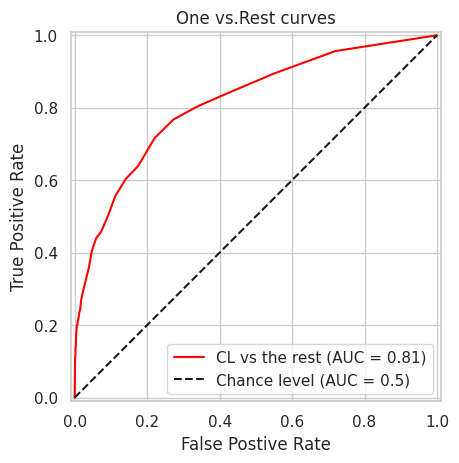

In [166]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    randomForest_original_pred[:, class_id],
    name=f"{class_target} vs the rest",
    color="red",
    plot_chance_level = True,
)
_= display.ax_.set(
    xlabel="False Postive Rate",
    ylabel="True Positive Rate",
    title = "One vs.Rest curves",
)



Calculate the AUC-Score for every dataset

### Create various models based on the best dataset

create confusion matrixes + description

plot the roc-curve for the models

calculate the auc-score for the models